# Analyse en composantes principales (ACP)

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Données iris utilisées

In [2]:
iris = pandas.read_table("D:\\simplon\\ia\\Projet de groupe octobre 2022\\020123\\Iris.txt", sep = "\t")
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris2 = iris.drop("Species", axis = 1)
iris2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Réalisation de l'ACP

In [4]:
pca = PCA(n_components = 4)
pca.fit(scale(iris2))

PCA(n_components=4)

### Calcul des valeurs propres

In [5]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.93808505 0.9201649  0.14774182 0.02085386]
[0.72962445 0.22850762 0.03668922 0.00517871]


❓Qu'est-ce qu'une valeur propre? 

Les données sont représentées dans le système de coordonnées X-Y. La réduction de la dimension est obtenue en identifiant les directions principales, appelées composantes principales, dans lesquelles les données varient.Les dimensions de notre jeu de données peuvent être réduites à une seule dimension en projetant chaque échantillon sur le premier axe principal. la quantité de variance expliquée par chaque composante principale est mesurée par ce que l’on appelle valeur propre.
 
Les valeurs propres de la matrice de corrélation, ou de la matrice de covariance des variables actives jouent un rôle important dans le calcul des composantes principales. En plus de déterminer les coordonnées factorielles des variables et individus, elles donnent une assez bonne idée de la variance expliquée par le nombre de facteurs donné. Cette information peut de plus être utilisée pour déterminer l'ordre dans lequel vous pouvez proposer de réduire les dimensions de l'espace original des variables ou individus, sans perdre beaucoup d'information. Sur la base des valeurs propres, beaucoup de critères peuvent être utilisés pour décider du nombre idéal de facteurs dans une situation donnée. Puisque la somme des valeurs propre est égale au nombre de variables ‘actives’, la moyenne des valeurs propres est de 1, et l'approche générale est de commencer tout d'abord avec les valeurs propres supérieures à 1.
 

In [7]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.938085,73.0,73.0
1,Dim2,0.920165,23.0,96.0
2,Dim3,0.147742,4.0,99.0
3,Dim4,0.020854,1.0,100.0


## Choix du nombre de composantes

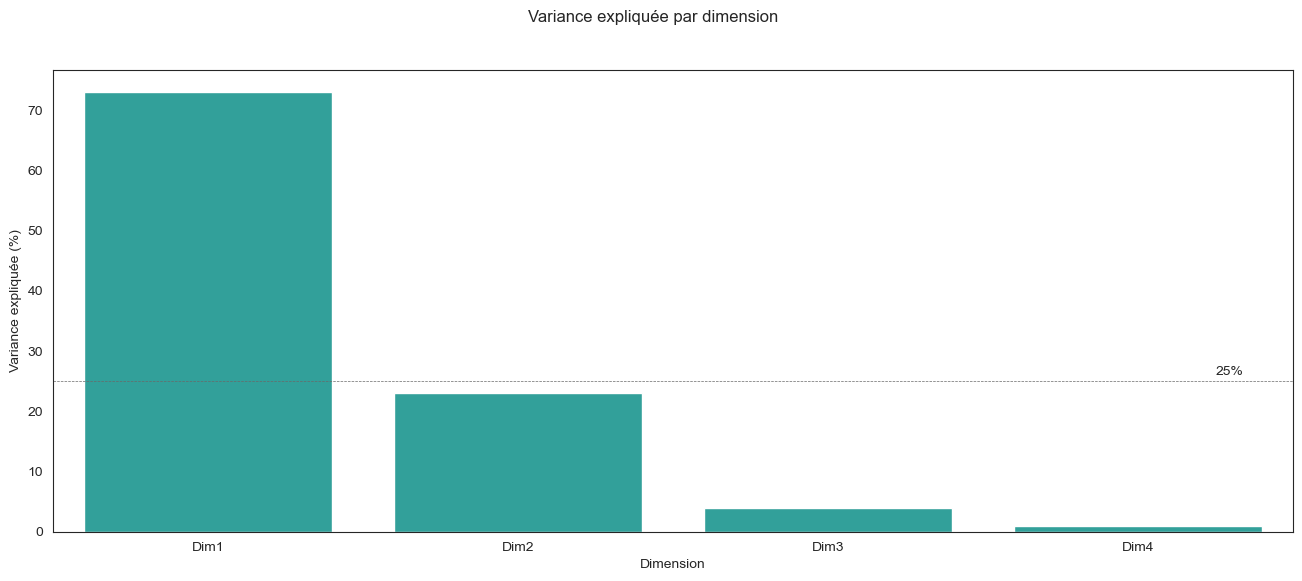

In [8]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
plt.text(3.25, 26, "25%")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

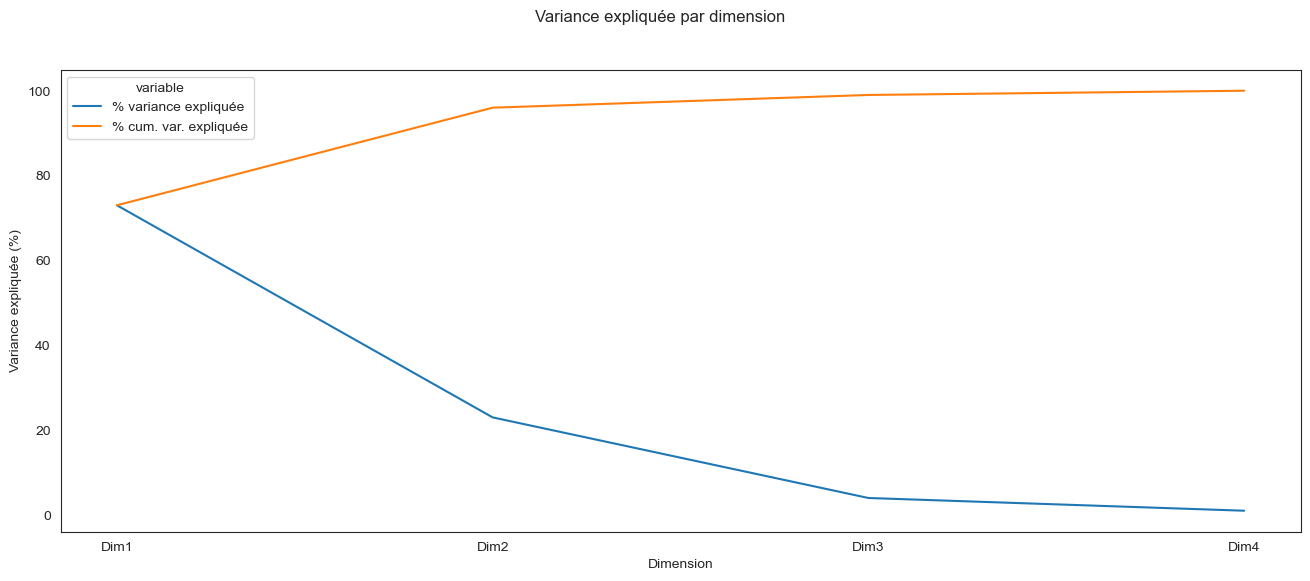

In [9]:
plt.figure(figsize=(16, 6))

eig2 = eig.filter(["Dimension", "% variance expliquée", "% cum. var. expliquée"]).melt(id_vars = "Dimension")
g_eig2 = seaborn.lineplot(x = "Dimension", 
                 y = "value",
                 hue = "variable",
                 data = eig2)

g_eig2.set(ylabel = "Variance expliquée (%)")
g_eig2.figure.suptitle("Variance expliquée par dimension")

plt.show()

❓A votre avis, combien de dimensions devrions-nous conserver ?

Les deux premieres dimensions explique 96% des variances et leurs valeurs proche sont les plus fortes, elles sont a conserver. Il faut etre au decu de 95% 

### Visualisation via le nuage de points

In [11]:
iris_pca = pca.transform(iris[iris.columns[:4]])
iris_pca_df = pandas.DataFrame({
    "Dim1" : iris_pca[:,0], 
    "Dim2" : iris_pca[:,1], 
    "Species" : iris.Species
})
iris_pca_df.head()

C:\Users\lilou\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,Dim1,Dim2,Species
0,2.640270,5.204041,setosa
1,2.670730,4.666910,setosa
2,2.454606,4.773636,setosa
3,2.545517,4.648463,setosa
4,2.561228,5.258629,setosa


#### Représentation des variables

In [12]:
coordvar = pca.components_.T * numpy.sqrt(pca.explained_variance_)
coordvar_df = pandas.DataFrame(coordvar, columns=['PC'+str(i) for i in range(1, 5)], index=iris.columns[:4])
coordvar_df

,PC1,PC2,PC3,PC4
Sepal Length,0.893151,0.362039,-0.276581,-0.037732
Sepal Width,-0.461684,0.885673,0.093934,0.017836
Petal Length,0.994877,0.023494,0.054629,0.115736
Petal Width,0.968212,0.064214,0.243797,-0.075612


❓A quoi correspondent ces valeurs dans le tableau à votre avis ?

Le tableau des corrélations variables-facteurs. Il s’agit des coefficients de corrélation linéaire entre
les variables initiales et les facteurs. Ce sont ces corrélations qui vont permettre
de donner un sens aux facteurs (de les interpréter).

#### Cercle des corrélations

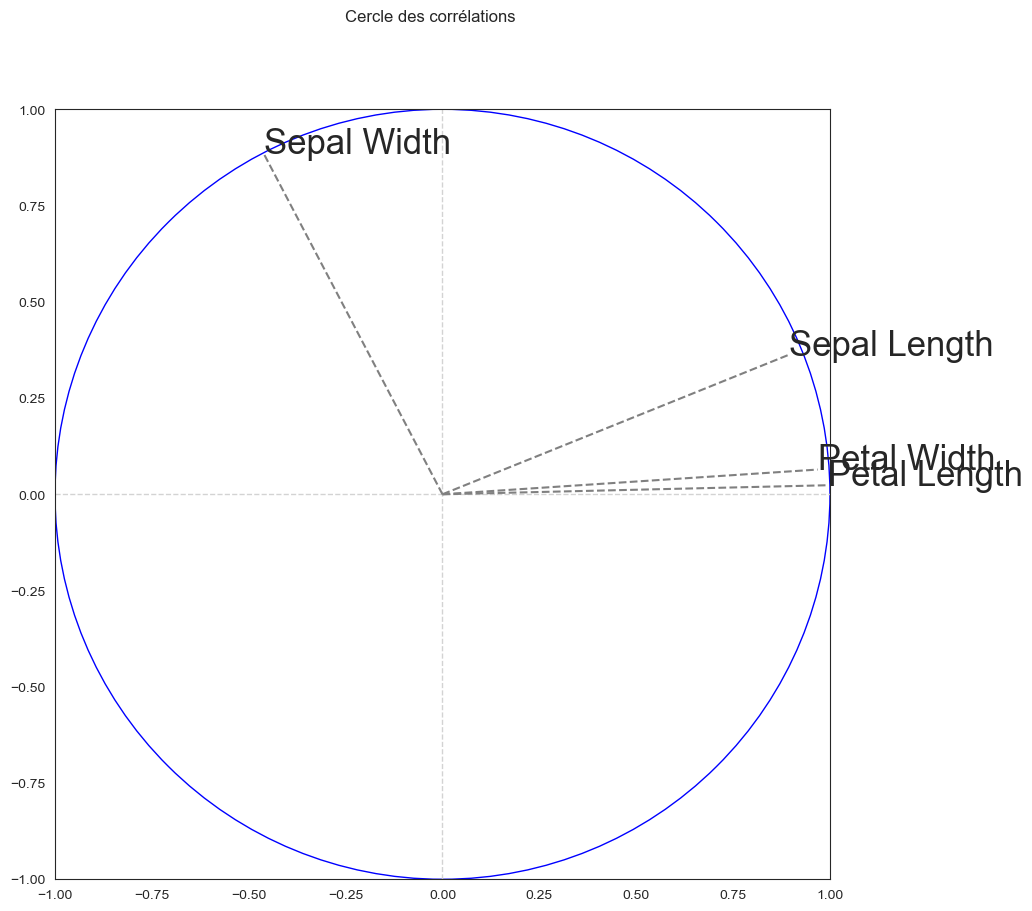

In [13]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(4):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC2"][j], coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

❓Interpréter les 2 premiers axes

La corrélation de chaque point sur un axe exprime la qualité de représentation du point sur l'axe. Elle prend des valeurs entre 0 (pas corrélé du tout) et 1 (fortement corrélé). Si cette valeur est proche de 1, alors le point est bien représenté sur l'axe.le cercle est de rayon 1. 2 flèches perpendiculaires correspondent à des variables indépendantes (non corrélées).étudier les liaisons entre les variables. On va donc chercher à savoir s’il y a des groupes de variables qui sont fortement corrélées entre elles (deux à deux).Si de tels groupes existent, alors toutes les variables d’un groupe donné seront « synthétisables » (résumables) par une variable synthétique.


pour Sepal Length	pc1 0.893151	pc2 0.362039 donc on voit qu'il est plus exp par dim 1 que par deux 


### Représentation des individus ET des variables

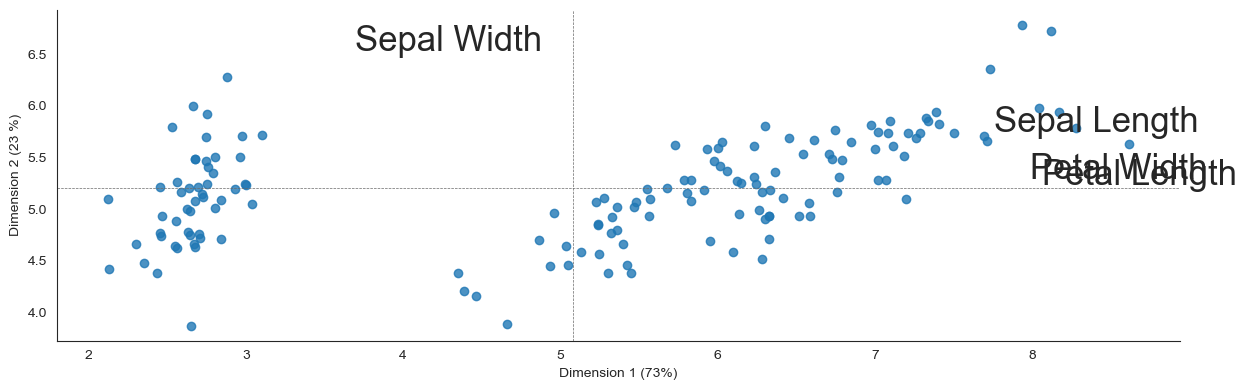

In [14]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", data = iris_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
#g_pca.fig.suptitle("Premier plan factoriel")
axes = g_pca.axes[0,0]
for j in range(4):
    axes.text(coordvar_df["PC1"][j] * 3 + iris_pca_df.Dim1.mean(),
              coordvar_df["PC2"][j] * 1.5 + iris_pca_df.Dim2.mean(), 
              coordvar_df.index[j], size = 25)
plt.axvline(x = iris_pca_df.Dim1.mean(), linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = iris_pca_df.Dim2.mean(), linewidth = .5, color = "dimgray", linestyle = "--")

plt.show()

### Représentation des individus

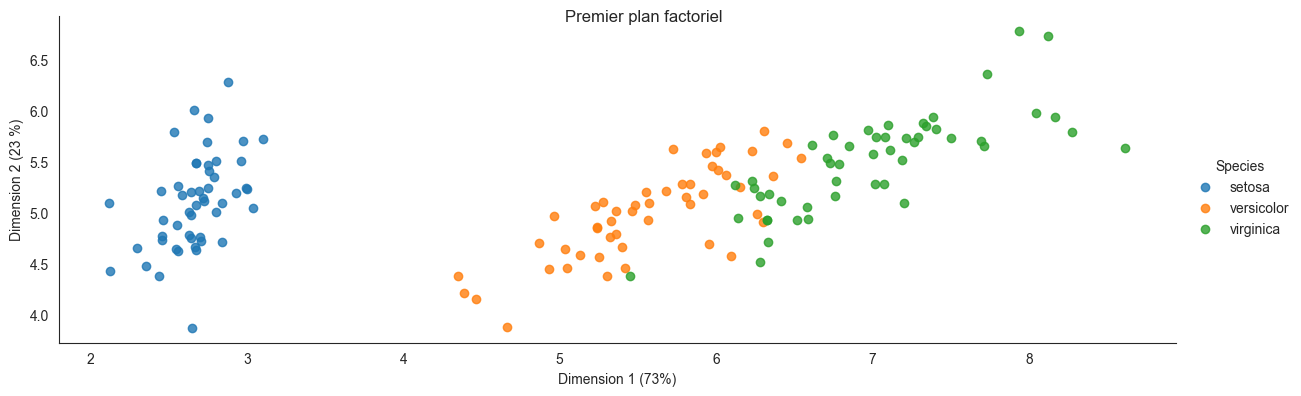

In [16]:
g_pca = seaborn.lmplot(x = "Dim1", y = "Dim2", hue = "Species", data = iris_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

❓Que pouvez-vous dire de ce graphique ?